In [1]:
import os
import h5py
import numpy as np

from scipy.ndimage import zoom
import matplotlib.pyplot as plt

In [7]:
os.chdir('/home/snow/Coding/Granular-Compression')
filePath = r"Data/Scan_162.hdf5"
dataPath = r'/RawData/Scan_162'

# Import data
with h5py.File(filePath,'r') as f: 
    data = f[dataPath][()] # (slices, rows, width)

# Choose correct coordinates & crop
data = np.transpose(data,[1,2,0]) # (rows, width, slices)
croppedData = data[150:1100,50:970,:]

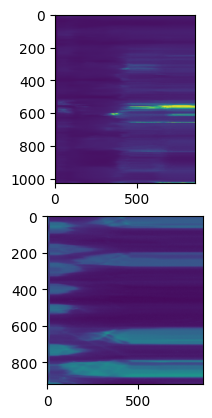

In [10]:
plt.subplot(2,1,1)
plt.imshow(data[:][:][50])
plt.subplot(2,1,2)
plt.imshow(croppedData[:][:][50])

In [ ]:
# Rescale and save
rescaleData = zoom(croppedData, 0.25)
flatData = np.concatenate([np.ravel(slice_) for slice_ in rescaleData])
with h5py.File('downscale_162.hdf5', 'w') as f: 
    f.create_dataset("default", data=flatData)
    f.attrs["shape"] = rescaleData.shape